<a href="https://colab.research.google.com/github/ishakale0908/BML/blob/main/expt9_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/diabetes.csv')

**EXPERIMENT 9**


>PCA(Principal Component Analysis) ---Manual Implementation

https://www.analyticsvidhya.com/blog/2022/07/principal-component-analysis-beginner-friendly/



**STEPS:-**

step 1:-Standardizing the dataset

step 2:- Computing the covariance matrix

step 3:-Computing eigen values and eigen vectors

step 4:-Sorting corresponding eigen values and eigen vectors

step 5:- Multiply eigen vectors and eigen vectors.Get the transformed data

In [ ]:
import numpy as np
# Standardizing the dataset
mean = np.mean(df, axis=0)
std_dev = np.std(df, axis=0)
standardized_data = (df - mean) / std_dev

# Computing the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sorting eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Transforming the original dataset
transformed_data = np.dot(standardized_data, eigenvectors)

print("Standardized Data:\n", standardized_data)
print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Transformed Data:\n", transformed_data)


Standardized Data:
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigr

In [ ]:
# Drop the target column (Outcome) for PCA
data = df.drop(columns=['Outcome'])

# Standardize the dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Compute covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select first two principal components (PC1 and PC2)
eigenvectors_pc1_pc2 = eigenvectors[:, :2]

# Transform the original dataset using PC1 and PC2
transformed_data_pc1_pc2 = np.dot(standardized_data, eigenvectors_pc1_pc2)

print("Eigenvalues (Top 2):\n", eigenvalues[:2])
print("Eigenvectors (PC1 & PC2):\n", eigenvectors_pc1_pc2)
print("Transformed Data (PC1 & PC2):\n", transformed_data_pc1_pc2)


Eigenvalues (Top 2):
 [2.09711056 1.73346726]
Eigenvectors (PC1 & PC2):
 [[-0.1284321  -0.59378583]
 [-0.39308257 -0.17402908]
 [-0.36000261 -0.18389207]
 [-0.43982428  0.33196534]
 [-0.43502617  0.25078106]
 [-0.45194134  0.1009598 ]
 [-0.27061144  0.122069  ]
 [-0.19802707 -0.62058853]]
Transformed Data (PC1 & PC2):
 [[-1.06850273 -1.23489499]
 [ 1.12168331  0.73385167]
 [ 0.39647671 -1.59587594]
 ...
 [ 0.28347525 -0.09706503]
 [ 1.06032431 -0.83706234]
 [ 0.83989172  1.15175485]]


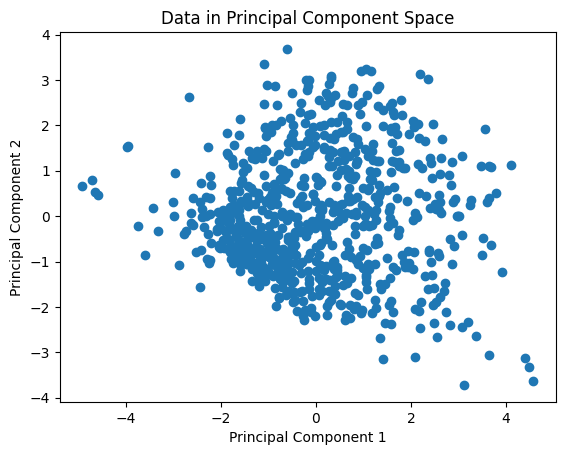

In [ ]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Principal Component Space')
plt.show()

Explained Variance Ratio:
 [0.26179749 0.21640127]
Principal Components:
 [[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]
Transformed Data (PC1 & PC2):
 [[ 1.06850273  1.23489499]
 [-1.12168331 -0.73385167]
 [-0.39647671  1.59587594]
 ...
 [-0.28347525  0.09706503]
 [-1.06032431  0.83706234]
 [-0.83989172 -1.15175485]]


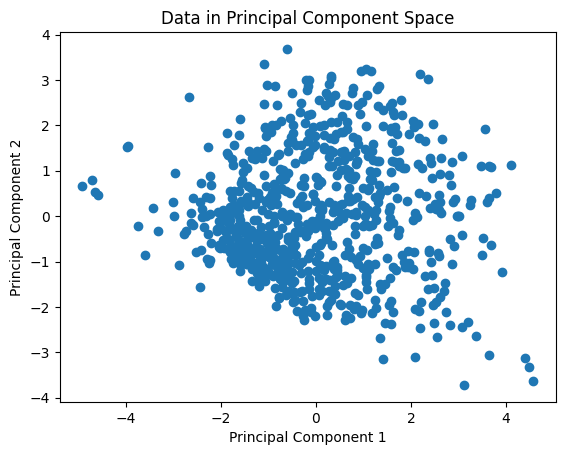

In [ ]:
#using built in library code of pca
from sklearn.decomposition import PCA
# Drop the target column (Outcome) for PCA
data = df.drop(columns=['Outcome'])

# Standardize the dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Apply PCA with two principal components
pca = PCA(n_components=2)
transformed_data_pc1_pc2 = pca.fit_transform(standardized_data)

# Print results
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("Principal Components:\n", pca.components_)
print("Transformed Data (PC1 & PC2):\n", transformed_data_pc1_pc2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Principal Component Space')
plt.show()



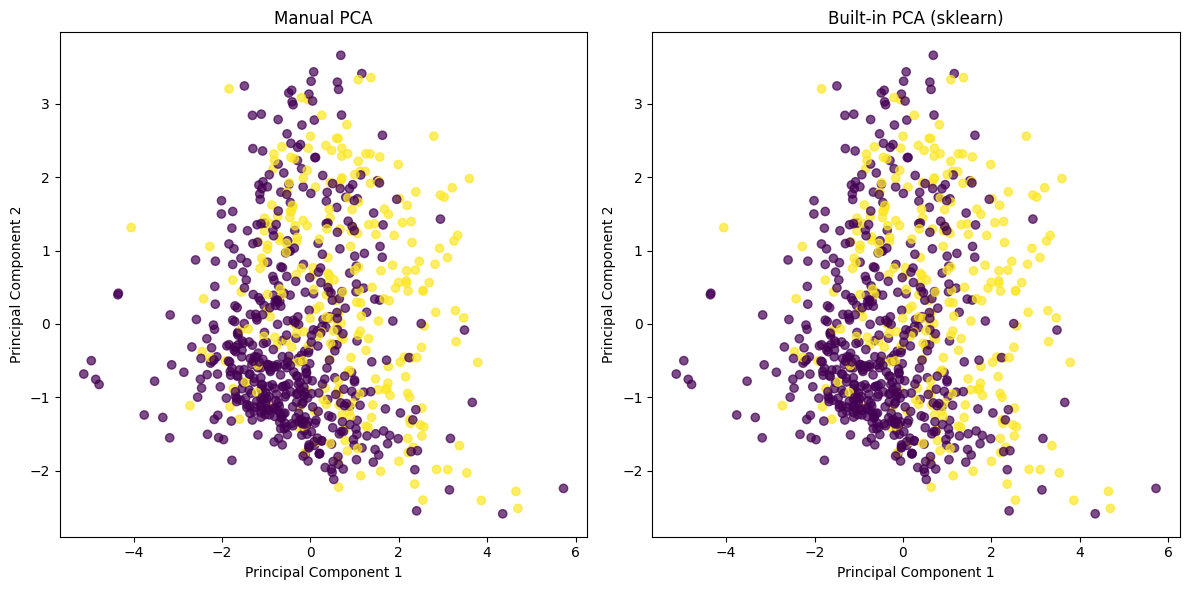

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))



# Manual PCA
plt.subplot(1, 2, 1)
plt.scatter(manual_pca[:, 0], manual_pca[:, 1], c=df['Outcome'], cmap='viridis', alpha=0.7)
plt.title('Manual PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Built-in PCA
# Assuming transformed_data_pc1_pc2 from your built-in PCA calculation is the intended data
built_in_pca = transformed_data_pc1_pc2

plt.subplot(1, 2, 2)
plt.scatter(built_in_pca[:, 0], built_in_pca[:, 1], c=df['Outcome'], cmap='viridis', alpha=0.7)
plt.title('Built-in PCA (sklearn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

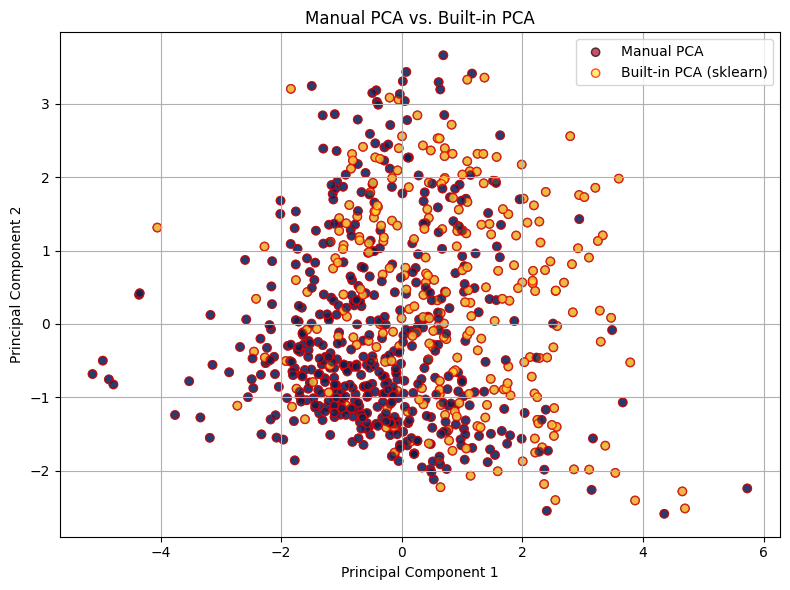

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Manual PCA
plt.scatter(manual_pca[:, 0], manual_pca[:, 1], c=df['Outcome'], cmap='coolwarm',edgecolors='k', alpha=0.7, label='Manual PCA')

# Built-in PCA
plt.scatter(built_in_pca[:, 0], built_in_pca[:, 1], c=df['Outcome'], cmap='cividis',edgecolors='r', alpha=0.7, label='Built-in PCA (sklearn)')

plt.title('Manual PCA vs. Built-in PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()  # Show legend to differentiate between the two datasets
plt.grid()
plt.tight_layout()
plt.show()
